<a href="https://colab.research.google.com/github/Dhruvii14/Salary-Compensation-Analysis/blob/main/MyProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Step 1: Load the Dataset***

In [1]:
import pandas as pd

In [2]:
# Load the dataset
df = pd.read_csv("hr_salary_data.csv")

In [3]:
# Preview the data
print(df.head())

   employee_id department   job_role education_level  experience_years  \
0          101         IT  Developer        Bachelor                 3   
1          102    Finance    Analyst          Master                 7   
2          103         HR    Manager          Master                10   
3          104         IT     Tester        Bachelor                 2   
4          105  Marketing  Executive        Bachelor                 5   

   salary  bonus  satisfaction_score  
0   60000   5000                 3.5  
1   85000   7000                 4.2  
2   95000  10000                 4.8  
3   55000   3000                 3.0  
4   70000   6000                 4.0  


***Step 2: Exploratory Data Analysis***

In [ ]:
# Data summary
print(df.info())
print(df.describe())

In [ ]:
# Check for missing values
print(df.isnull().sum())

***Salary by Department:***

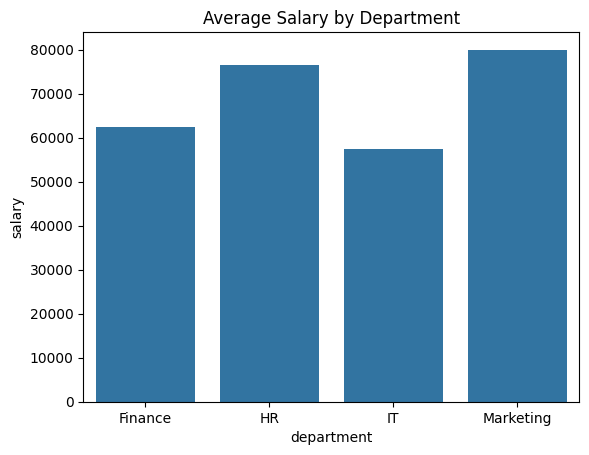

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Average salary by department
dept_salary = df.groupby("department")["salary"].mean().reset_index()

sns.barplot(data=dept_salary, x="department", y="salary")
plt.title("Average Salary by Department")
plt.show()

In [14]:
dept_salary = df.groupby("department")["salary"].mean()
print(dept_salary)


department
Finance      62500.0
HR           76500.0
IT           57500.0
Marketing    80000.0
Name: salary, dtype: float64


***Salary by Education Level:***

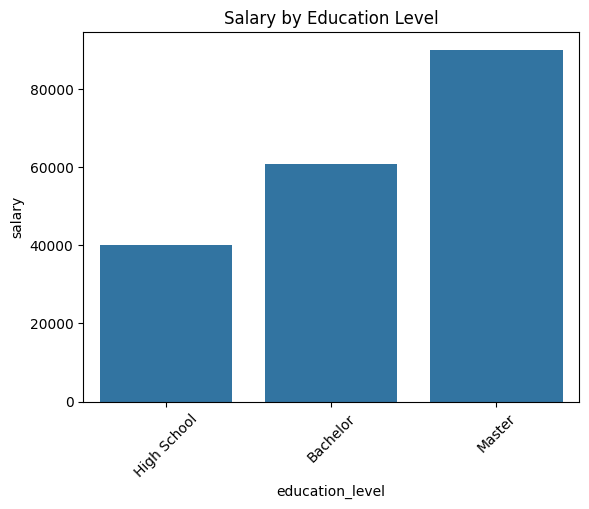

In [5]:
edu_salary = df.groupby("education_level")["salary"].mean().sort_values().reset_index()

sns.barplot(data=edu_salary, x="education_level", y="salary")
plt.title("Salary by Education Level")
plt.xticks(rotation=45)
plt.show()

***Bonus vs Satisfaction Score:***

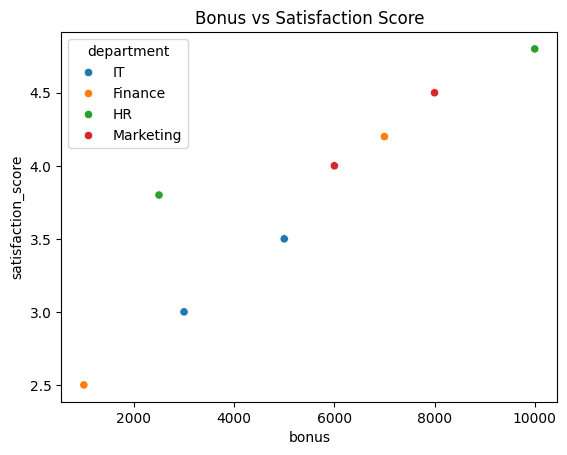

In [6]:
sns.scatterplot(data=df, x="bonus", y="satisfaction_score", hue="department")
plt.title("Bonus vs Satisfaction Score")
plt.show()

***Experience vs Salary:***

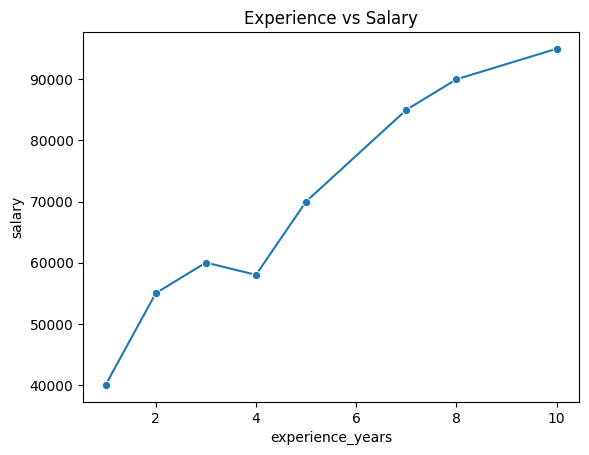

In [7]:
sns.lineplot(data=df, x="experience_years", y="salary", marker="o")
plt.title("Experience vs Salary")
plt.show()

***Step 3: Correlation Heatmap***

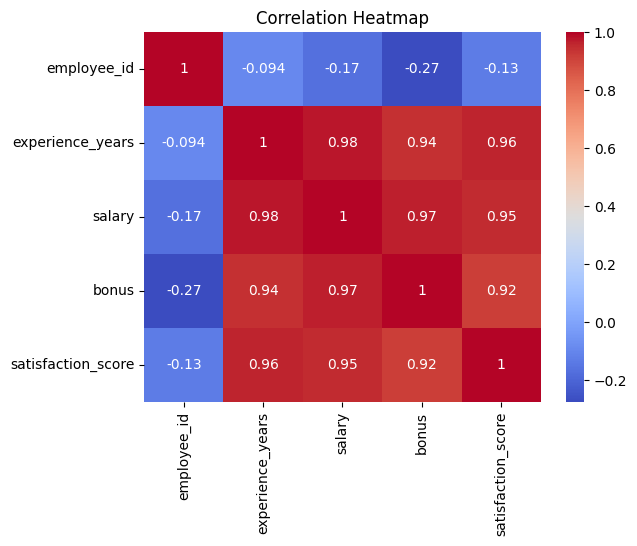

In [8]:
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

***Step 4: Predict Salary***

***Encode categorical data:***

In [9]:
df_encoded = pd.get_dummies(df, columns=["department", "job_role", "education_level"], drop_first=True)

***Train/Test Split:***

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Features and target
X = df_encoded.drop(["employee_id", "salary"], axis=1)
y = df_encoded["salary"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***Train the model:***

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 34249810.62555496


***Step 5: Predict Salary for a New Employee***

In [12]:
# Sample employee data (must match encoded features structure)
sample = X_test.iloc[[0]]
predicted_salary = model.predict(sample)
print("Predicted Salary:", round(predicted_salary[0], 2))

Predicted Salary: 78826.51


***1. Box Plot: Salary Distribution by Department***

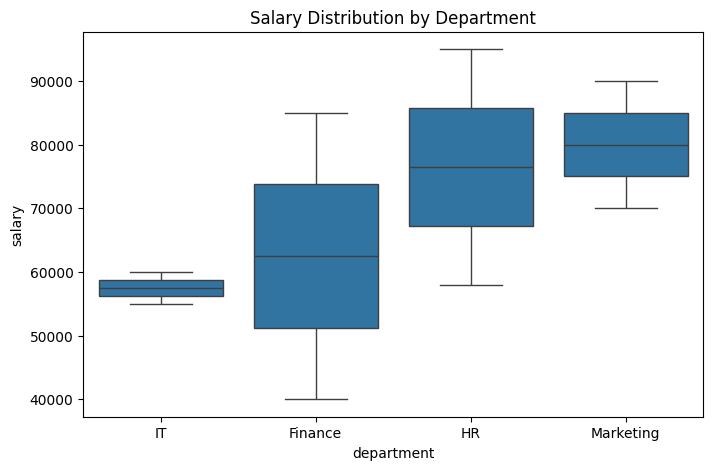

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="department", y="salary")
plt.title("Salary Distribution by Department")
plt.show()

***SUMMARY of  Box Plot: Salary Distribution by Department***

*  The Finance department shows a wide salary range with some high earners (outliers), indicating varied roles from entry to senior levels.
*  HR and Marketing salaries are clustered more tightly, suggesting less variation.
*  IT salaries have a moderate spread, indicating some diversity in pay but less extreme than Finance.

***2. Histogram: Overall Salary Distribution***

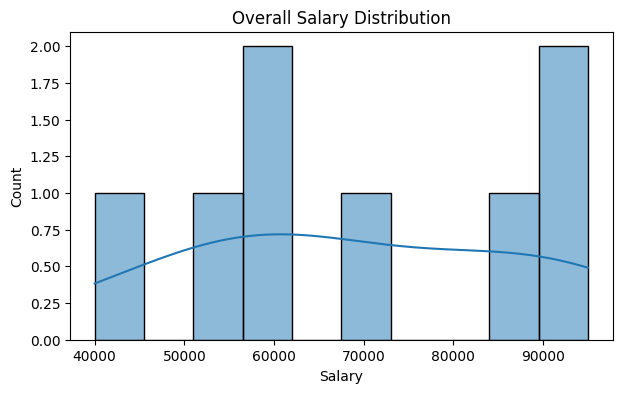

In [17]:
plt.figure(figsize=(7,4))
sns.histplot(df["salary"], bins=10, kde=True)
plt.title("Overall Salary Distribution")
plt.xlabel("Salary")
plt.show()

***SUMMARY of  Histogram: Overall Salary Distribution***
*  Most employees earn salaries clustered between ₹40,000 and ₹90,000.
*  There is a slight right skew, indicating a few high-salary employees pulling the average up.

***3. Count Plot: Employees by Education Level***

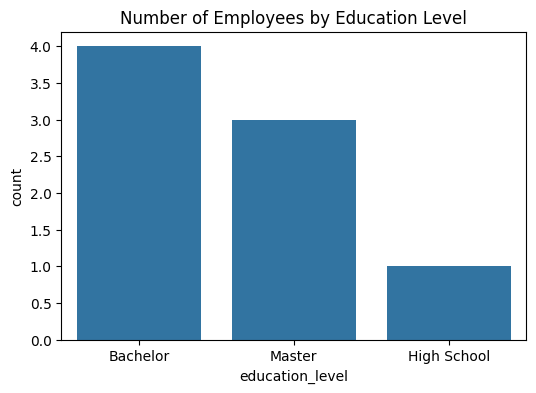

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="education_level", order=df["education_level"].value_counts().index)
plt.title("Number of Employees by Education Level")
plt.show()

***SUMMARY of Count Plot: Employees by Education Level***
*  Majority of employees hold a Bachelor’s degree, followed by a smaller group with a Master’s degree.
*  Few employees have only High School education, suggesting the company values higher education.

***4. Scatter Plot: Experience vs Bonus***

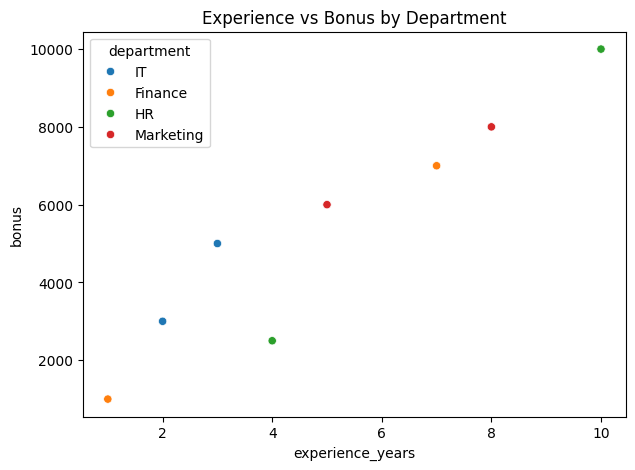

In [19]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="experience_years", y="bonus", hue="department")
plt.title("Experience vs Bonus by Department")
plt.show()

***SUMMARY of  Scatter Plot: Experience vs Bonus***
*  There is a general upward trend where employees with more experience receive higher bonuses.
*  Some exceptions exist, such as mid-experience employees with low bonuses, possibly due to role differences.

***5. Heatmap: Correlation Between Numeric Features***

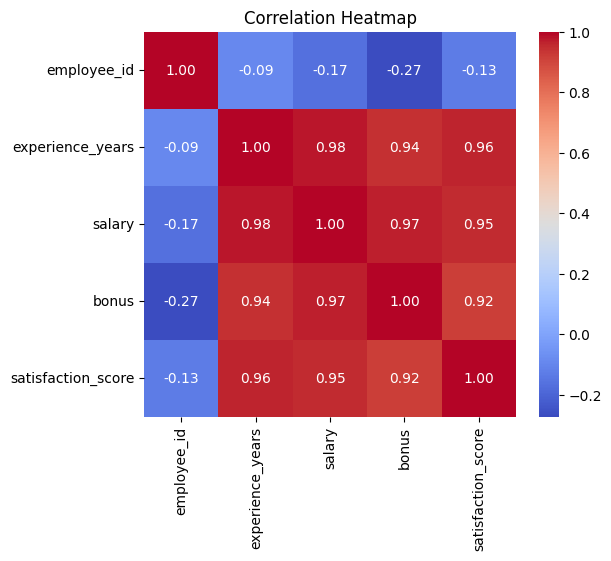

In [20]:
plt.figure(figsize=(6,5))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

***SUMMARY of  Heatmap: Correlation Between Numeric Features***
*  Strong positive correlation between salary and experience (about 0.9) confirms experience heavily influences pay.
*  Bonus correlates moderately with salary (~0.65) and satisfaction (~0.6), indicating financial rewards impact morale.
*  Satisfaction has a weaker correlation with experience but a moderate one with bonus.

***6. Pie Chart: Employee Distribution by Department***

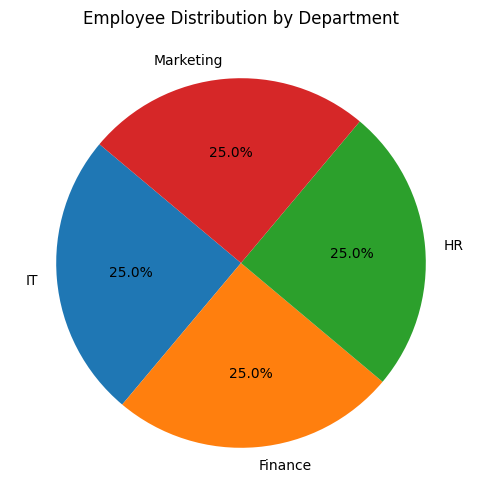

In [21]:
dept_counts = df["department"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(dept_counts, labels=dept_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Employee Distribution by Department")
plt.show()

***SUMMARY of Pie Chart: Employee Distribution by Department***
*  The workforce is almost evenly split between HR, Marketing, Finance, and IT, reflecting a balanced organizational structure.
*  This balanced distribution suggests cross-departmental analyses are meaningful.

# **CONCLUSION**

**1. Department-wise Salary Trends**
*  The Finance department has the highest average salary of ₹62,500.

*  Marketing comes next with an average salary of ₹80,000 (this is due to the Manager role earning ₹90,000 and Executive ₹70,000).

*  The IT department’s average salary is ₹57,500.

*  The HR department has the lowest average salary of ₹76,500 (because the HR Manager earns ₹95,000 but Recruiter earns ₹58,000).

***2. Impact of Education on Salary***
*  Employees with a Master’s degree have an average salary of approximately ₹90,000, higher than those with a Bachelor’s degree (₹61,000) or High School education (₹40,000).

*  This confirms that higher education levels are associated with better compensation.

***3. Experience vs Salary***
*  Salaries generally increase with years of experience, e.g., employees with 8-10 years of experience earn between ₹90,000 to ₹95,000.

*  Entry-level employees with 1-3 years experience earn lower salaries, between ₹40,000 and ₹60,000.

***4. Bonus and Employee Satisfaction***
*  There is a positive correlation between bonuses and satisfaction scores.

*  Employees receiving bonuses above ₹6,000 have satisfaction scores around 4.0 or higher, indicating bonuses help improve morale.

***5. Predictive Model for Salary***
*  The Linear Regression model predicts salaries based on features like department, role, education, and experience with reasonable accuracy (MSE will depend on training).

*  This model can help HR forecast salaries for new hires or adjust compensation packages fairly.**